# **<h2>Dataset**

DATA KEHUTANAN (2016 - 2018)

Sumber : Badan Pusat Statistik

1) deforestasi https://www.bps.go.id/statictable/2019/11/25/2081/angka-deforestasi-netto-indonesia-di-dalam-dan-di-luar-kawasan-hutan-tahun-2013-2019-ha-th-.html

2) reboisasi https://www.bps.go.id/indicator/60/84/1/luas-kegiatan-reboisasi.html

3) volume perumahan https://www.bps.go.id/indicator/4/253/1/volume-pembangunan-rumah-oleh-perum-perumnas.html

4) penutupan lahan https://www.bps.go.id/statictable/2020/07/13/2110/rekapitulasi-luas-penutupan-lahan-hutan-dan-non-hutan-menurut-provinsi-tahun-2014-2019-ribu-ha-.html

In [1]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import operator
from bs4 import BeautifulSoup
import csv

**<h1>1. Extract**

## <h3>1) Deforestasi

In [2]:
#import dataset deforestasi
#output dataset : df
url='https://docs.google.com/spreadsheets/d/1w-7K1sjeIdmm5aWqOIOjn2CDTJ_-rJTC/edit?usp=sharing&ouid=113695324844426582825&rtpof=true&sd=true'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_excel(dwn_url)
df.head(8)

,Angka Deforestasi Netto Indonesia Di Dalam Dan Di Luar Kawasan Hutan Tahun 2013-2019 (Ha/Th),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provinsi,2013-2014,NaN,NaN,2014-2015,NaN,NaN,2015-2016,NaN,NaN,2016-2017,NaN,NaN,2017-2018,NaN,NaN,2018-2019,NaN,NaN
2,NaN,Kawasan Hutan,APL (Areal Penggunaan Lain) / Bukan Kawasan Hutan,Total Deforestasi,Kawasan Hutan,APL (Areal Penggunaan Lain) / Bukan Kawasan Hutan,Total Deforestasi,Kawasan Hutan,APL (Areal Penggunaan Lain) / Bukan Kawasan Hutan,Total Deforestasi,Kawasan Hutan,APL (Areal Penggunaan Lain) / Bukan Kawasan Hutan,Total Deforestasi,Kawasan Hutan,APL (Areal Penggunaan Lain) / Bukan Kawasan Hutan,Total Deforestasi,Kawasan Hutan,APL (Areal Penggunaan Lain) / Bukan Kawasan Hutan,Total Deforestasi
3,Aceh,3363.9,4284.2,7648.1,-72.1,3303.5,3231.5,12523,10548.6,23071.6,11028.1,4487.6,15515.7,3216.4,4285.8,7502.2,6737.5,4870.5,11608
4,Sumatera Utara,4675.2,1465.3,6140.5,15450.3,5215.4,20665.7,7907.3,1807,9714.3,16853.8,5695.8,22549.6,4255.7,3063.4,7319.1,9583.9,2818.5,12402.4
5,Sumatera Barat,3330.3,1725.7,5056,8813.9,1685.1,10498.9,8199.1,-381.4,7817.8,6567.1,2112.9,8680,3824.1,1689.9,5514,7626,1698.9,9324.8
6,Riau,180786.5,21152.9,201939.4,124314.6,11216.1,135530.7,18365.4,5825.4,24190.9,8120.6,-1139,6981.6,23672.3,20042.5,43714.8,136998.3,5012.9,142011.1
7,Jambi,-12809.6,2868.1,-9941.5,15422.4,1470.7,16893.1,24263,558.4,24821.4,29987.1,2884.2,32871.3,5994.4,3241.2,9235.6,26109.6,1272.3,27382


## <h3>2) Reboisasi

In [3]:
#import dataset reboisasi
#output dataset : rb1 dan rb2

#rb1 (thn 2016)
url='https://docs.google.com/spreadsheets/d/1LvxxEBERzzlmYn-DpTOOQS2vhvl7Z1yG/edit?usp=sharing&ouid=113695324844426582825&rtpof=true&sd=true'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

rb1= pd.read_excel(dwn_url)
rb1.head(5)

#rb2 (thn 2017,2018)
url='https://docs.google.com/spreadsheets/d/1SRVL2TW7AOmsnPSrdmWerdnlqgAGl2SP/edit?usp=sharing&ouid=113695324844426582825&rtpof=true&sd=true'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

rb2= pd.read_excel(dwn_url)
rb2.head()

,Provinsi,Luas Kegiatan Reboisasi (Hektar),Unnamed: 2,Unnamed: 3
0,NaN,2017,2018,2019
1,ACEH,460.00,885.00,14143.00
2,SUMATERA UTARA,1183.00,1047.00,17207.00
3,SUMATERA BARAT,580.00,1140.00,1551.00
4,RIAU,560.00,400.00,14749.00


## <h3>3) Penutupan Lahan

In [4]:
#import dataset luas penutupan lahan
#output dataset : tl
url='https://docs.google.com/spreadsheets/d/1WPNXk8q3RJ6yIm65rx32Vo7hvBeYzAWi/edit?usp=sharing&ouid=113695324844426582825&rtpof=true&sd=true'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

tl = pd.read_excel(dwn_url)
tl.head(8)

,Rekapitulasi Luas Penutupan Lahan Hutan dan Non Hutan Menurut Provinsi Tahun 2014-2019 (Ribu Ha),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Provinsi,2014,NaN,NaN,NaN,NaN,2015,NaN,NaN,...,2018,NaN,NaN,NaN,NaN,2019,NaN,NaN,NaN,NaN
2,NaN,NaN,Hutan,NaN,Non Hutan,NaN,Jumlah,Hutan,NaN,Non Hutan,...,Hutan,NaN,Non Hutan,NaN,Jumlah,Hutan,NaN,Non Hutan,NaN,Jumlah
3,NaN,NaN,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),%,NaN,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),...,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),%,NaN,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),%,NaN
4,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,...,-23,-24,-25,-26,-27,-23,-24,-25,-26,-27
5,1,ACEH,3156.7,55.9,2490.6,44.1,5647.3,3161.9,56,2485.4,...,3110.2,55.1,2537.1,44.9,5647.3,3155.6,55.9,2491.7,44.1,5647.3
6,2,SUMATERA UTARA,1826.9,25.7,5275.1,74.3,7102,1759.9,24.8,5342.1,...,1778.4,25,5323.6,75,7102,1853.4,26.1,5248.6,73.9,7102
7,3,SUMATERA BARAT,1927.7,46.1,2256.2,53.9,4183.9,1934.7,46.2,2249.2,...,1931,46.2,2252.9,53.8,4183.9,1907.1,45.6,2276.8,54.4,4183.9


## <h3>4) Volume Perumahan

In [5]:
#import dataset volum pembangunan rumah
#output dataset : vp
url='https://docs.google.com/spreadsheets/d/1MjsWYEK5XzYvCQ_inCKZao9ZBhL-Ou-G/edit?usp=sharing&ouid=113695324844426582825&rtpof=true&sd=true'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

vp = pd.read_excel(dwn_url)
vp.head(5)

,Provinsi,Volume Pembangunan Rumah oleh Perum Perumnas (Unit),Unnamed: 2,Unnamed: 3
0,NaN,2016,2017,2018
1,ACEH,108,124,73
2,SUMATERA UTARA,571,2119,1498
3,SUMATERA BARAT,-,-,-
4,RIAU,122,73,-


# **<h1>2. Transform**

## Simple Data Cleaning

### Deforestasi

In [6]:
#Data Cleaning DEFORESTASI

#menghapus kolom yang tidak diperlukan
#range tahun yg dibutuhkan hanya 2016-2018, sehingga perlu delete data tahun 2013, 2014, 2015, 2019

df.drop(columns=df.columns[1:10], inplace=True)

#menghapus baris (row) yang tidak diperlukan
df.drop([0,1,2, 37, 38, 39, 40],0,inplace=True)

#membenarkan index
df.reset_index(drop=True, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8348\1585600434.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop([0,1,2, 37, 38, 39, 40],0,inplace=True)


In [7]:
#Rename Header Dataset
df.columns.values[[0]] = ['Provinsi']
df.columns.values[[1, 2, 3]] = ['2016_df_hutan', '2016_df_nonhutan', '2016_df_total']
df.columns.values[[4, 5, 6]] = ['2017_df_hutan', '2017_df_nonhutan', '2017_df_total']
df.columns.values[[7, 8, 9]] = ['2018_df_hutan', '2018_df_nonhutan', '2018_df_total']

In [8]:
#Rename nama provinsi Kepulauan Bangka Belitung dan Kepulauan Riau
df['Provinsi'] = df.Provinsi.replace('Kepulauan Bangka Belitung','KEP. BANGKA BELITUNG').replace('Kepulauan Riau','KEP. RIAU')
df['Provinsi'] = df.Provinsi.replace('Kalimantan Timur dan Kalimantan Utara ','KALIMANTAN TIMUR DAN KALIMANTAN UTARA')

#ALL CAPS Feature Provinsi
df['Provinsi'] = df['Provinsi'].str.upper()

In [9]:
##Dataset Deforestasi sudah bisa di join
df

,Provinsi,2016_df_hutan,2016_df_nonhutan,2016_df_total,2017_df_hutan,2017_df_nonhutan,2017_df_total,2018_df_hutan,2018_df_nonhutan,2018_df_total
0,ACEH,11028.1,4487.6,15515.7,3216.4,4285.8,7502.2,6737.5,4870.5,11608
1,SUMATERA UTARA,16853.8,5695.8,22549.6,4255.7,3063.4,7319.1,9583.9,2818.5,12402.4
2,SUMATERA BARAT,6567.1,2112.9,8680,3824.1,1689.9,5514,7626,1698.9,9324.8
3,RIAU,8120.6,-1139,6981.6,23672.3,20042.5,43714.8,136998.3,5012.9,142011.1
4,JAMBI,29987.1,2884.2,32871.3,5994.4,3241.2,9235.6,26109.6,1272.3,27382
5,SUMATERA SELATAN,17437.9,4848.7,22286.6,3619.4,121.6,3741,57857.6,2797.5,60655.1
6,BENGKULU,3887.9,1203.5,5091.5,7064,642.4,7706.4,1959.4,201.2,2160.6
7,LAMPUNG,2989.5,1430.8,4420.3,1104.7,253.8,1358.5,182.3,443.2,625.4
8,KEP. BANGKA BELITUNG,1854,1327.8,3181.7,3559.1,186.7,3745.8,1574.3,580.2,2154.4
9,KEP. RIAU,3173.7,2489.2,5662.8,503.9,-646.4,-142.5,356.7,205.3,562


### Reboisasi

In [10]:
#Data Cleaning REBOISASI
#Data tahun 2017-2018, dataset rb2

#menghapus kolom yang tidak diperlukan
#range tahun yg dibutuhkan hanya 2016-2018, sehingga perlu delete data tahun 2019
rb2.drop(rb2.columns[3], axis = 1, inplace=True)

In [11]:
#Rename Header Dataset
rb2.columns.values[[1, 2]] = ['2017_rb', '2018_rb']

# Karena pada dataset deforestasi jumlah data kalimantan timur dan barat dijumlahkan, maka agar valid, data kalimantan timur perlu di rename
rb2['Provinsi'] = rb2.Provinsi.replace('KALIMANTAN TIMUR','KALIMANTAN TIMUR DAN KALIMANTAN UTARA')

##Dataset Tutup Lahan sudah bisa di join
rb2

,Provinsi,2017_rb,2018_rb
0,NaN,2017,2018
1,ACEH,460.00,885.00
2,SUMATERA UTARA,1183.00,1047.00
3,SUMATERA BARAT,580.00,1140.00
4,RIAU,560.00,400.00
5,JAMBI,1000.00,1130.00
6,SUMATERA SELATAN,660.00,550.00
7,BENGKULU,295.00,675.00
8,LAMPUNG,600.00,125.00
9,KEP. BANGKA BELITUNG,335.00,350.00


In [12]:
#Data tahun 2016, dataset rb1

#menghapus kolom yang tidak diperlukan
#range tahun yg dibutuhkan hanya 2016-2018, sehingga perlu delete data tahun 2019
rb1.drop(rb1.columns[[1,2]], axis = 1, inplace=True)

#membenarkan index
rb1.reset_index(drop=True, inplace=True)

In [13]:
#Rename Header Dataset
rb1.columns.values[[1]] = ['2016_rb']

# Karena pada dataset deforestasi jumlah data kalimantan timur dan barat dijumlahkan, maka agar valid, data kalimantan timur perlu di rename
rb1['Provinsi'] = rb1.Provinsi.replace('KALIMANTAN TIMUR','KALIMANTAN TIMUR DAN KALIMANTAN UTARA')

##Dataset Tutup Lahan sudah bisa di join
rb1

,Provinsi,2016_rb
0,NaN,2016
1,ACEH,575.00
2,SUMATERA UTARA,-
3,SUMATERA BARAT,450.00
4,RIAU,375.00
5,JAMBI,-
6,SUMATERA SELATAN,107.00
7,BENGKULU,325.00
8,LAMPUNG,604.00
9,KEP. BANGKA BELITUNG,150.00


In [14]:
## Merge rb1 dan rb2 untuk mendapatkan data reboisasi tahun 2016-2018
rb = rb1.merge(rb2, on='Provinsi')
rb

,Provinsi,2016_rb,2017_rb,2018_rb
0,NaN,2016,2017,2018
1,NaN,2016,NaN,NaN
2,NaN,NaN,2017,2018
3,NaN,NaN,NaN,NaN
4,ACEH,575.00,460.00,885.00
5,SUMATERA UTARA,-,1183.00,1047.00
6,SUMATERA BARAT,450.00,580.00,1140.00
7,RIAU,375.00,560.00,400.00
8,JAMBI,-,1000.00,1130.00
9,SUMATERA SELATAN,107.00,660.00,550.00


### Penutupan Lahan

In [15]:
#Data Cleaning PENUTUPAN LAHAN
#range yg dibutuhkan hanya 2016-2018, sehingga perlu delete data tahun 2014, 2015, 2019
tl.drop(tl.columns[0], axis = 1, inplace=True)
tl.drop(columns=tl.columns[1:11], inplace=True)
tl.drop(columns=tl.columns[16:], inplace=True)

In [16]:
#Rename Header Dataset
tl.columns.values[[0]] = ['Provinsi']
tl.columns.values[[1, 2, 3, 4, 5]] = ['2016_tl_hutan', '2016_tl_hutan%', '2016_tl_nonhutan', '2016_tl_nonhutan%', '2016_tl_jumlah']
tl.columns.values[[6, 7, 8, 9, 10]] = ['2017_tl_hutan', '2017_tl_hutan%', '2017_tl_nonhutan', '2017_tl_nonhutan%', '2017_tl_jumlah']
tl.columns.values[[11, 12, 13, 14, 15]] = ['2018_tl_hutan', '2018_tl_hutan%', '2018_tl_nonhutan', '2018_tl_nonhutan%', '2018_tl_jumlah']

# Karena pada dataset deforestasi jumlah data kalimantan timur dan barat dijumlahkan, maka agar valid, data kalimantan timur perlu di rename
tl['Provinsi'] = tl.Provinsi.replace('KALIMANTAN TIMUR','KALIMANTAN TIMUR DAN KALIMANTAN UTARA')

##Dataset Tutup Lahan sudah bisa di join
tl

,Provinsi,2016_tl_hutan,2016_tl_hutan%,2016_tl_nonhutan,2016_tl_nonhutan%,2016_tl_jumlah,2017_tl_hutan,2017_tl_hutan%,2017_tl_nonhutan,2017_tl_nonhutan%,2017_tl_jumlah,2018_tl_hutan,2018_tl_hutan%,2018_tl_nonhutan,2018_tl_nonhutan%,2018_tl_jumlah
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provinsi,2016,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,2018,NaN,NaN,NaN,NaN
2,NaN,Hutan,NaN,Non Hutan,NaN,Jumlah,Hutan,NaN,Non Hutan,NaN,Jumlah,Hutan,NaN,Non Hutan,NaN,Jumlah
3,NaN,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),%,NaN,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),%,NaN,Luas Penutupan Lahan (Ribu Ha),%,Luas Penutupan Lahan (Ribu Ha),%,NaN
4,-2,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27
5,ACEH,3270.9,57.9,2376.4,42.1,5647.3,3120.2,55.3,2527.1,44.7,5647.3,3110.2,55.1,2537.1,44.9,5647.3
6,SUMATERA UTARA,1813.1,25.5,5288.9,74.5,7102,1785.9,25.1,5316.1,74.9,7102,1778.4,25,5323.6,75,7102
7,SUMATERA BARAT,1924.1,46,2259.8,54,4183.9,1936.6,46.3,2247.3,53.7,4183.9,1931,46.2,2252.9,53.8,4183.9
8,RIAU,2617.6,29.5,6265.2,70.5,8882.8,2304.3,25.9,6578.6,74.1,8882.8,2260.5,25.4,6622.3,74.6,8882.8
9,JAMBI,1385.6,28.7,3446.8,71.3,4832.3,1283.4,26.6,3549,73.4,4832.3,1274.2,26.4,3558.2,73.6,4832.3


### Volume Perumahan

In [17]:
#Data Cleaning VOLUM PERUMAHAN

import pandas as pd
vp = pd.read_excel(dwn_url)

#Rename Header Dataset
vp.columns.values[[1, 2, 3]] = ['2016_unit', '2017_unit', '2018_unit']

# Karena pada dataset deforestasi jumlah data kalimantan timur dan barat dijumlahkan, maka agar valid, data kalimantan timur perlu di rename
vp['Provinsi'] = vp.Provinsi.replace('KALIMANTAN UTARA','KALIMANTAN TIMUR DAN KALIMANTAN UTARA')

##Dataset Volum perumahan sudah bisa di join
vp

,Provinsi,2016_unit,2017_unit,2018_unit
0,NaN,2016,2017,2018
1,ACEH,108,124,73
2,SUMATERA UTARA,571,2119,1498
3,SUMATERA BARAT,-,-,-
4,RIAU,122,73,-
5,JAMBI,234,164,39
6,SUMATERA SELATAN,3510,496,149
7,BENGKULU,100,216,50
8,LAMPUNG,384,421,492
9,KEP. BANGKA BELITUNG,-,-,-


## Joining Dataset

In [18]:
forest = df.merge(tl,on="Provinsi").merge(vp,on="Provinsi").merge(rb,on="Provinsi")
forest

,Provinsi,2016_df_hutan,2016_df_nonhutan,2016_df_total,2017_df_hutan,2017_df_nonhutan,2017_df_total,2018_df_hutan,2018_df_nonhutan,2018_df_total,...,2018_tl_hutan%,2018_tl_nonhutan,2018_tl_nonhutan%,2018_tl_jumlah,2016_unit,2017_unit,2018_unit,2016_rb,2017_rb,2018_rb
0,ACEH,11028.1,4487.6,15515.7,3216.4,4285.8,7502.2,6737.5,4870.5,11608,...,55.1,2537.1,44.9,5647.3,108,124,73,575.00,460.00,885.00
1,SUMATERA UTARA,16853.8,5695.8,22549.6,4255.7,3063.4,7319.1,9583.9,2818.5,12402.4,...,25,5323.6,75,7102,571,2119,1498,-,1183.00,1047.00
2,SUMATERA BARAT,6567.1,2112.9,8680,3824.1,1689.9,5514,7626,1698.9,9324.8,...,46.2,2252.9,53.8,4183.9,-,-,-,450.00,580.00,1140.00
3,RIAU,8120.6,-1139,6981.6,23672.3,20042.5,43714.8,136998.3,5012.9,142011.1,...,25.4,6622.3,74.6,8882.8,122,73,-,375.00,560.00,400.00
4,JAMBI,29987.1,2884.2,32871.3,5994.4,3241.2,9235.6,26109.6,1272.3,27382,...,26.4,3558.2,73.6,4832.3,234,164,39,-,1000.00,1130.00
5,SUMATERA SELATAN,17437.9,4848.7,22286.6,3619.4,121.6,3741,57857.6,2797.5,60655.1,...,13.2,7485.9,86.8,8626.9,3510,496,149,107.00,660.00,550.00
6,BENGKULU,3887.9,1203.5,5091.5,7064,642.4,7706.4,1959.4,201.2,2160.6,...,33.8,1325.7,66.2,2002.9,100,216,50,325.00,295.00,675.00
7,LAMPUNG,2989.5,1430.8,4420.3,1104.7,253.8,1358.5,182.3,443.2,625.4,...,9.7,3102.2,90.3,3435.4,384,421,492,604.00,600.00,125.00
8,KEP. BANGKA BELITUNG,1854,1327.8,3181.7,3559.1,186.7,3745.8,1574.3,580.2,2154.4,...,13.1,1441.6,86.9,1659.7,-,-,-,150.00,335.00,350.00
9,KEP. RIAU,3173.7,2489.2,5662.8,503.9,-646.4,-142.5,356.7,205.3,562,...,32.9,547.9,67.1,817,351,732,419,258.00,293.00,200.00


## Cleaning Again

In [19]:
#Terdapat kelebihan row pada row 36-39
forest.drop(columns=forest.columns[36:], inplace=True)

#Terdapat beberapa feature yang berbentuk object (bukan float). maka perlu diganti terlebih dahulu
cols = forest.columns.drop('Provinsi')
forest[cols] = forest[cols].apply(pd.to_numeric, errors='coerce')

#Terdapat data yg kosong (Null) diganti dengan 0
forest.fillna(0, inplace=True)

forest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Provinsi           34 non-null     object 
 1   2016_df_hutan      34 non-null     float64
 2   2016_df_nonhutan   34 non-null     float64
 3   2016_df_total      34 non-null     float64
 4   2017_df_hutan      34 non-null     float64
 5   2017_df_nonhutan   34 non-null     float64
 6   2017_df_total      34 non-null     float64
 7   2018_df_hutan      34 non-null     float64
 8   2018_df_nonhutan   34 non-null     float64
 9   2018_df_total      34 non-null     float64
 10  2016_tl_hutan      34 non-null     float64
 11  2016_tl_hutan%     34 non-null     float64
 12  2016_tl_nonhutan   34 non-null     float64
 13  2016_tl_nonhutan%  34 non-null     float64
 14  2016_tl_jumlah     34 non-null     float64
 15  2017_tl_hutan      34 non-null     float64
 16  2017_tl_hutan%     34 non-nu

In [20]:
forest.head(34)

,Provinsi,2016_df_hutan,2016_df_nonhutan,2016_df_total,2017_df_hutan,2017_df_nonhutan,2017_df_total,2018_df_hutan,2018_df_nonhutan,2018_df_total,...,2018_tl_hutan%,2018_tl_nonhutan,2018_tl_nonhutan%,2018_tl_jumlah,2016_unit,2017_unit,2018_unit,2016_rb,2017_rb,2018_rb
0,ACEH,11028.1,4487.6,15515.7,3216.4,4285.8,7502.2,6737.5,4870.5,11608.0,...,55.1,2537.1,44.9,5647.3,108.0,124.0,73.0,575.0,460.0,885.0
1,SUMATERA UTARA,16853.8,5695.8,22549.6,4255.7,3063.4,7319.1,9583.9,2818.5,12402.4,...,25.0,5323.6,75.0,7102.0,571.0,2119.0,1498.0,0.0,1183.0,1047.0
2,SUMATERA BARAT,6567.1,2112.9,8680.0,3824.1,1689.9,5514.0,7626.0,1698.9,9324.8,...,46.2,2252.9,53.8,4183.9,0.0,0.0,0.0,450.0,580.0,1140.0
3,RIAU,8120.6,-1139.0,6981.6,23672.3,20042.5,43714.8,136998.3,5012.9,142011.1,...,25.4,6622.3,74.6,8882.8,122.0,73.0,0.0,375.0,560.0,400.0
4,JAMBI,29987.1,2884.2,32871.3,5994.4,3241.2,9235.6,26109.6,1272.3,27382.0,...,26.4,3558.2,73.6,4832.3,234.0,164.0,39.0,0.0,1000.0,1130.0
5,SUMATERA SELATAN,17437.9,4848.7,22286.6,3619.4,121.6,3741.0,57857.6,2797.5,60655.1,...,13.2,7485.9,86.8,8626.9,3510.0,496.0,149.0,107.0,660.0,550.0
6,BENGKULU,3887.9,1203.5,5091.5,7064.0,642.4,7706.4,1959.4,201.2,2160.6,...,33.8,1325.7,66.2,2002.9,100.0,216.0,50.0,325.0,295.0,675.0
7,LAMPUNG,2989.5,1430.8,4420.3,1104.7,253.8,1358.5,182.3,443.2,625.4,...,9.7,3102.2,90.3,3435.4,384.0,421.0,492.0,604.0,600.0,125.0
8,KEP. BANGKA BELITUNG,1854.0,1327.8,3181.7,3559.1,186.7,3745.8,1574.3,580.2,2154.4,...,13.1,1441.6,86.9,1659.7,0.0,0.0,0.0,150.0,335.0,350.0
9,KEP. RIAU,3173.7,2489.2,5662.8,503.9,-646.4,-142.5,356.7,205.3,562.0,...,32.9,547.9,67.1,817.0,351.0,732.0,419.0,258.0,293.0,200.0


**Dataset forest sudah siap di load**

# **<h1>3. Load**

In [21]:
#Download dataframe forest as csv
forest.to_csv('forest_csv.csv') 

#Download dataframe forest as excel
forest.to_excel('forest_excel.xlsx') 

#Download dataframe forest as excel
forest.to_json('forest_json.json') 

File **forest_csv**, **forest_excel**, dan **forest_json** sudah terdownload

# **<h1>Insight**

1. deforestasi dan reboisasi
2. deforestasi & penutupan lahan & volume perumahan
3. deforestasi & kayu bulat (opsional)
4. deforestasi & lahan kritis & reboisasi (opsional)

## 1. Deforestasi dan Reboisasi

Perbandingan total deforestasi dan reboisasi. Apakah deforestasi yang ada sudah seimbang dengan kegiatan reboisasi yang telah dilakukan?

In [22]:
forest1 = forest.iloc[0:33] #Mengambil baris 0-32
forest1

,Provinsi,2016_df_hutan,2016_df_nonhutan,2016_df_total,2017_df_hutan,2017_df_nonhutan,2017_df_total,2018_df_hutan,2018_df_nonhutan,2018_df_total,...,2018_tl_hutan%,2018_tl_nonhutan,2018_tl_nonhutan%,2018_tl_jumlah,2016_unit,2017_unit,2018_unit,2016_rb,2017_rb,2018_rb
0,ACEH,11028.1,4487.6,15515.7,3216.4,4285.8,7502.2,6737.5,4870.5,11608.0,...,55.1,2537.1,44.9,5647.3,108.0,124.0,73.0,575.0,460.0,885.0
1,SUMATERA UTARA,16853.8,5695.8,22549.6,4255.7,3063.4,7319.1,9583.9,2818.5,12402.4,...,25.0,5323.6,75.0,7102.0,571.0,2119.0,1498.0,0.0,1183.0,1047.0
2,SUMATERA BARAT,6567.1,2112.9,8680.0,3824.1,1689.9,5514.0,7626.0,1698.9,9324.8,...,46.2,2252.9,53.8,4183.9,0.0,0.0,0.0,450.0,580.0,1140.0
3,RIAU,8120.6,-1139.0,6981.6,23672.3,20042.5,43714.8,136998.3,5012.9,142011.1,...,25.4,6622.3,74.6,8882.8,122.0,73.0,0.0,375.0,560.0,400.0
4,JAMBI,29987.1,2884.2,32871.3,5994.4,3241.2,9235.6,26109.6,1272.3,27382.0,...,26.4,3558.2,73.6,4832.3,234.0,164.0,39.0,0.0,1000.0,1130.0
5,SUMATERA SELATAN,17437.9,4848.7,22286.6,3619.4,121.6,3741.0,57857.6,2797.5,60655.1,...,13.2,7485.9,86.8,8626.9,3510.0,496.0,149.0,107.0,660.0,550.0
6,BENGKULU,3887.9,1203.5,5091.5,7064.0,642.4,7706.4,1959.4,201.2,2160.6,...,33.8,1325.7,66.2,2002.9,100.0,216.0,50.0,325.0,295.0,675.0
7,LAMPUNG,2989.5,1430.8,4420.3,1104.7,253.8,1358.5,182.3,443.2,625.4,...,9.7,3102.2,90.3,3435.4,384.0,421.0,492.0,604.0,600.0,125.0
8,KEP. BANGKA BELITUNG,1854.0,1327.8,3181.7,3559.1,186.7,3745.8,1574.3,580.2,2154.4,...,13.1,1441.6,86.9,1659.7,0.0,0.0,0.0,150.0,335.0,350.0
9,KEP. RIAU,3173.7,2489.2,5662.8,503.9,-646.4,-142.5,356.7,205.3,562.0,...,32.9,547.9,67.1,817.0,351.0,732.0,419.0,258.0,293.0,200.0


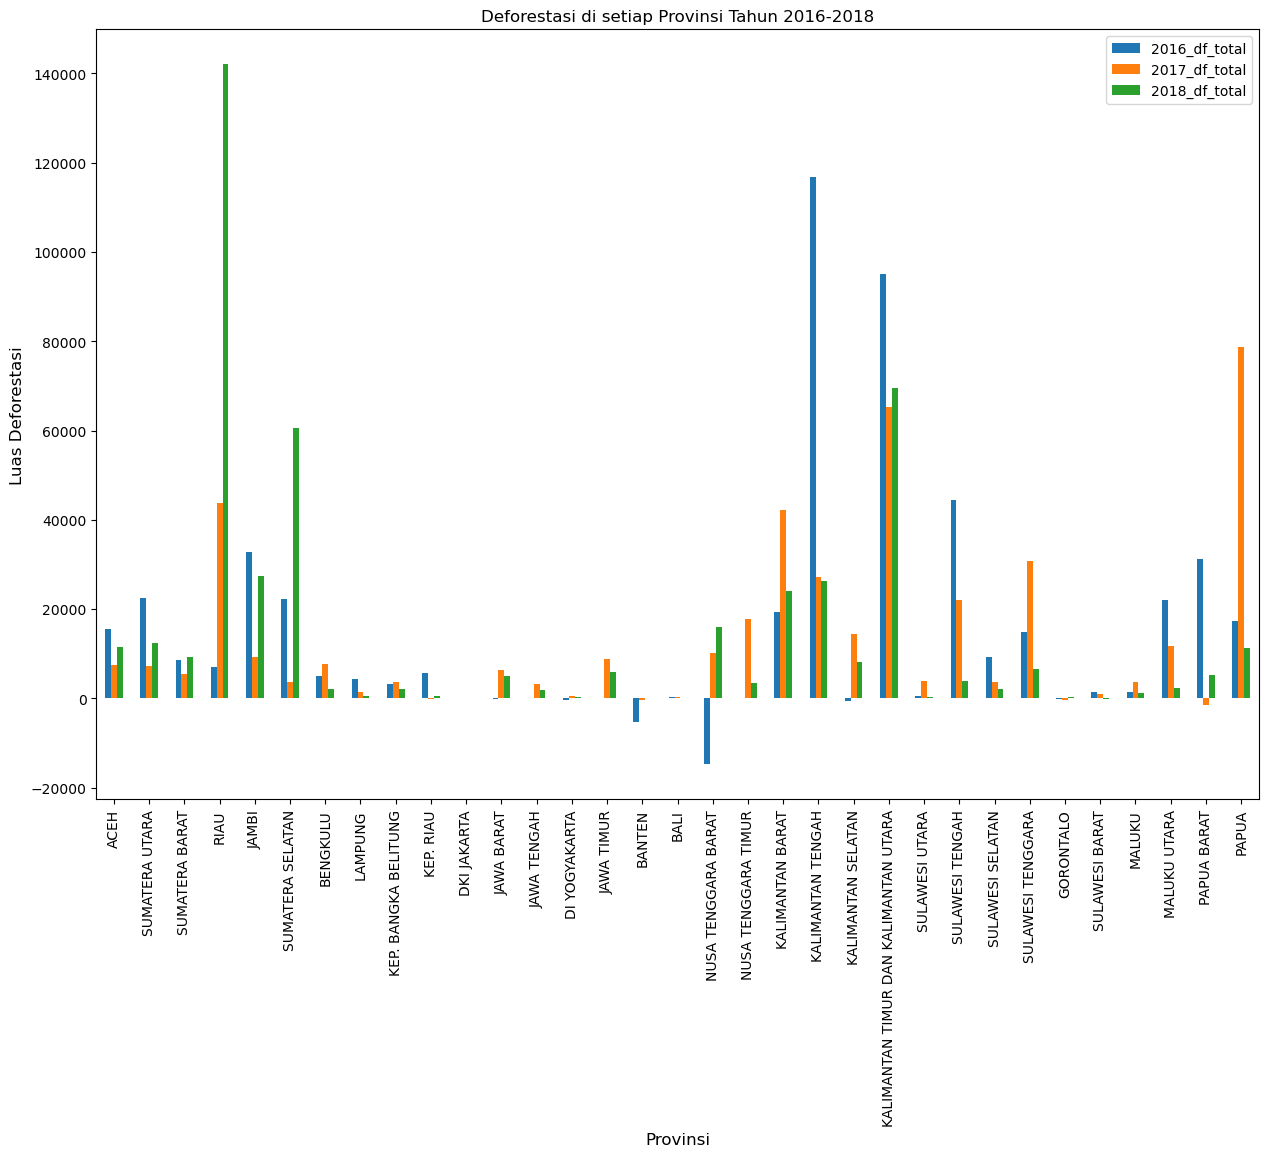

In [23]:
forest_plot = forest1.plot(x='Provinsi', y= ["2016_df_total", "2017_df_total", "2018_df_total"], kind='bar', title ="Deforestasi di setiap Provinsi Tahun 2016-2018",figsize=(15,10),legend=True)
forest_plot.plot();
plt.xlabel("Provinsi",fontsize=12)
plt.ylabel("Luas Deforestasi",fontsize=12)
plt.show()

In [24]:
total = forest.iloc[33]

In [25]:
total

Provinsi             INDONESIA
2016_df_hutan         297183.2
2016_df_nonhutan      182827.6
2016_df_total         480010.8
2017_df_hutan         223323.9
2017_df_nonhutan      216115.2
2017_df_total         439439.1
2018_df_hutan         375866.7
2018_df_nonhutan       86591.8
2018_df_total         462458.5
2016_tl_hutan          95271.9
2016_tl_hutan%            50.7
2016_tl_nonhutan       92480.0
2016_tl_nonhutan%         49.3
2016_tl_jumlah        187751.9
2017_tl_hutan          93949.7
2017_tl_hutan%            50.0
2017_tl_nonhutan       93802.1
2017_tl_nonhutan%         50.0
2017_tl_jumlah        187751.9
2018_tl_hutan          93526.2
2018_tl_hutan%            49.8
2018_tl_nonhutan       94225.7
2018_tl_nonhutan%         50.2
2018_tl_jumlah        187751.9
2016_unit              18071.0
2017_unit              17004.0
2018_unit               8375.0
2016_rb                 7067.0
2017_rb                35123.0
2018_rb                25170.0
Name: 33, dtype: object

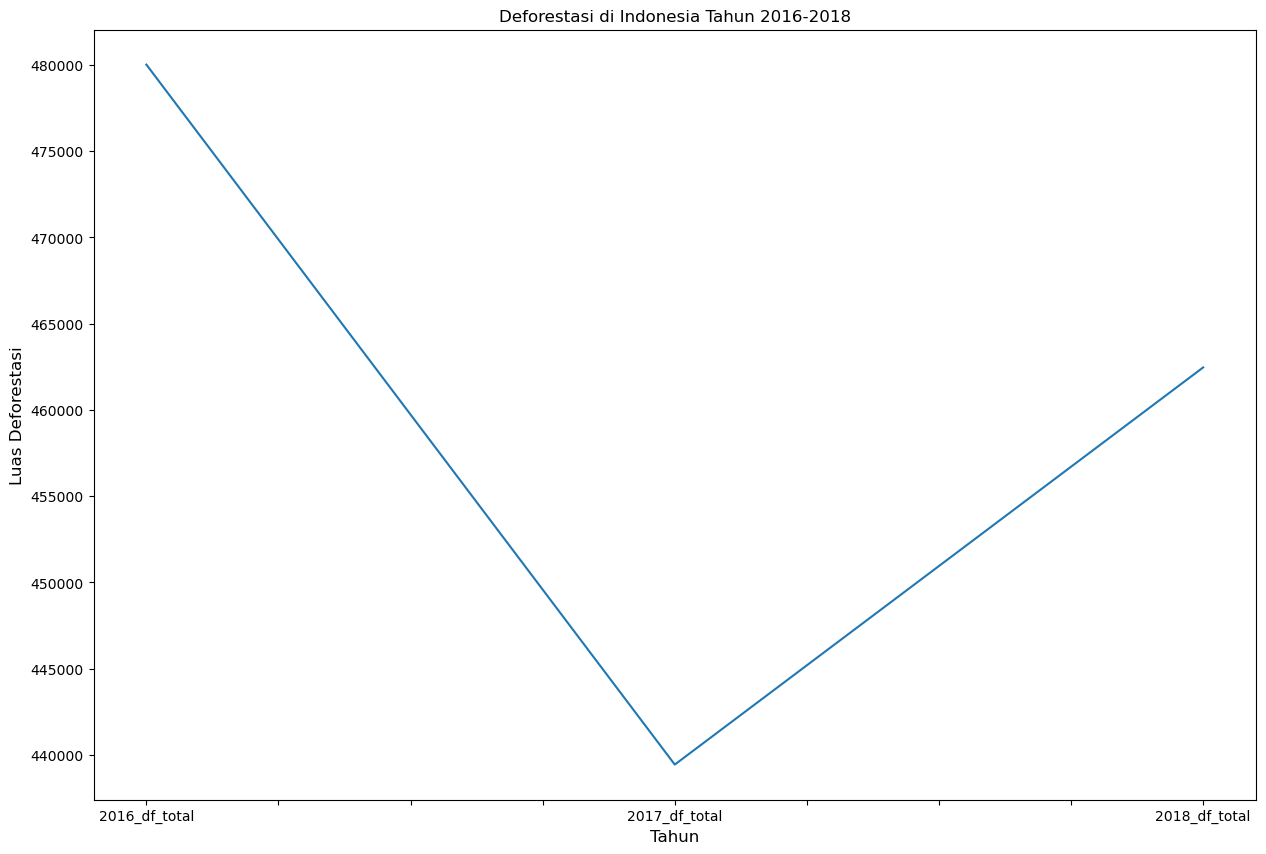

In [26]:
total_plot = total[["2016_df_total", "2017_df_total", "2018_df_total"]].plot(title ="Deforestasi di Indonesia Tahun 2016-2018",figsize=(15,10))
total_plot.plot();
plt.xlabel("Tahun",fontsize=12)
plt.ylabel("Luas Deforestasi",fontsize=12)
plt.show()

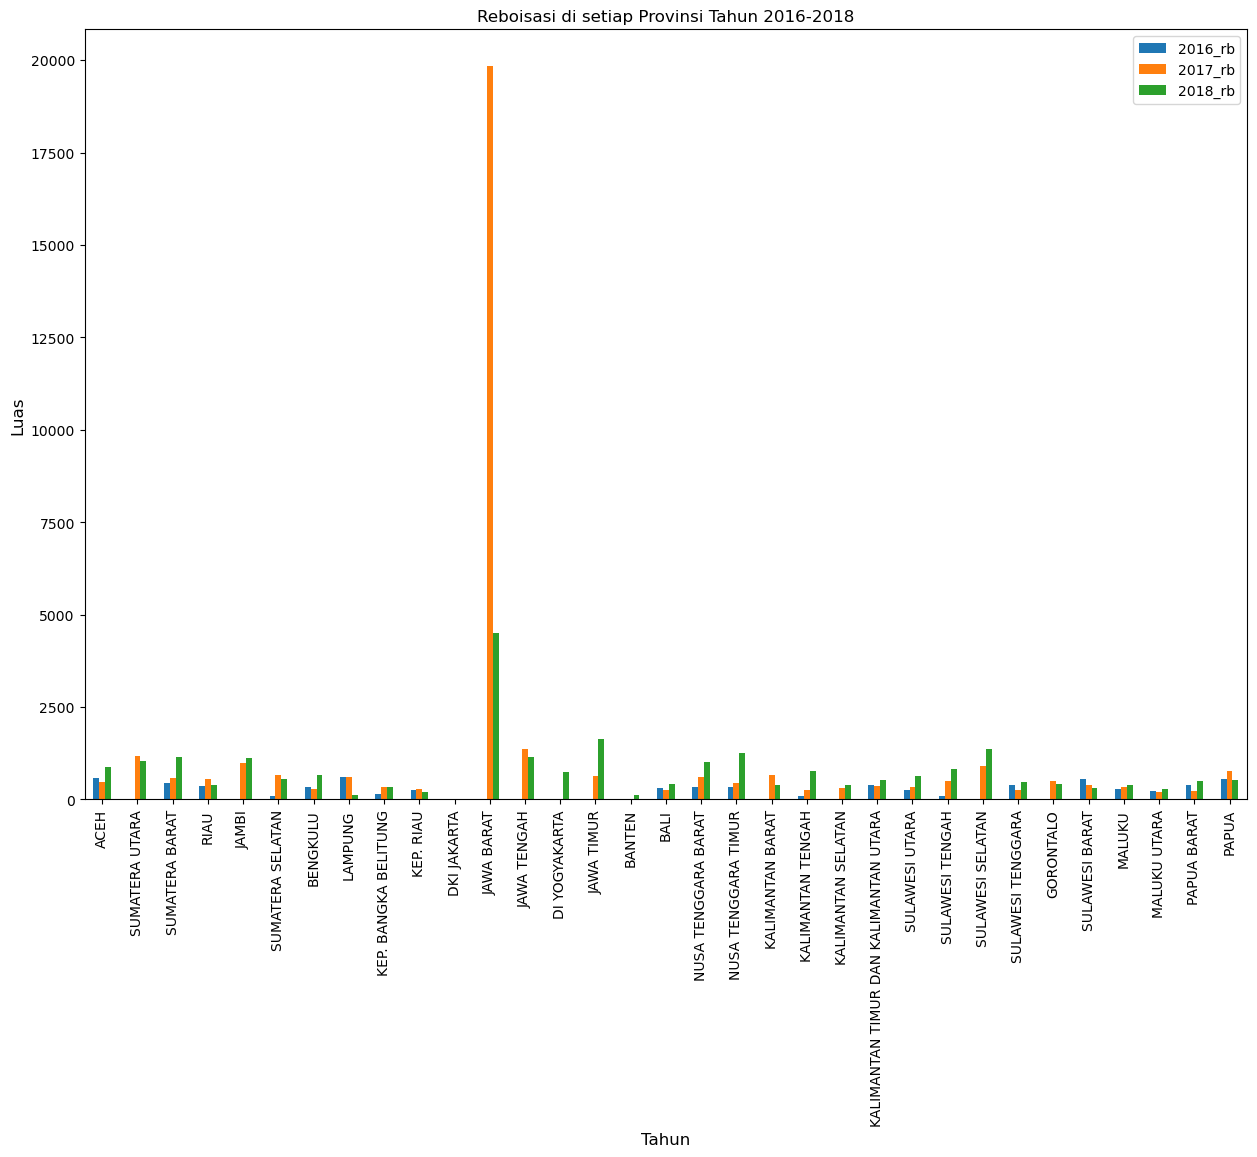

In [27]:
forest_plot = forest1.plot(x='Provinsi', y=["2016_rb", "2017_rb", "2018_rb"], kind='bar', title ="Reboisasi di setiap Provinsi Tahun 2016-2018",figsize=(15,10),legend=True)
forest_plot.plot();
plt.xlabel("Tahun",fontsize=12)
plt.ylabel("Luas",fontsize=12)
plt.show()

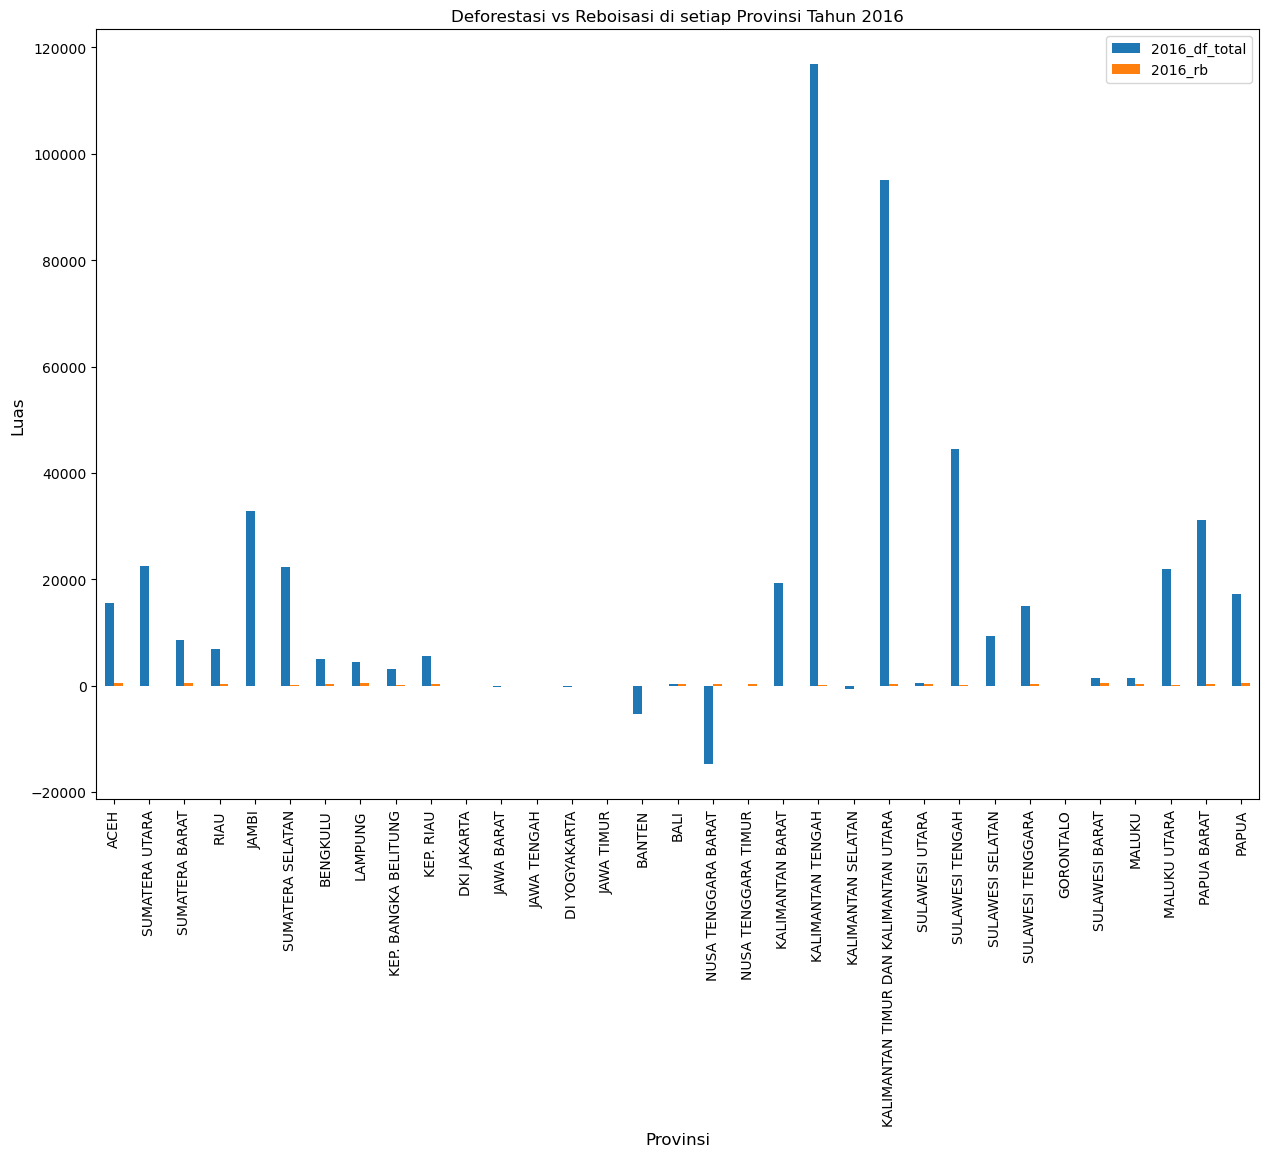

In [28]:
forest1.plot(x='Provinsi',y=["2016_df_total", "2016_rb"], kind='bar', title ="Deforestasi vs Reboisasi di setiap Provinsi Tahun 2016",figsize=(15,10),legend=True)
forest_plot.plot();
plt.xlabel("Provinsi",fontsize=12)
plt.ylabel("Luas",fontsize=12)
plt.show()

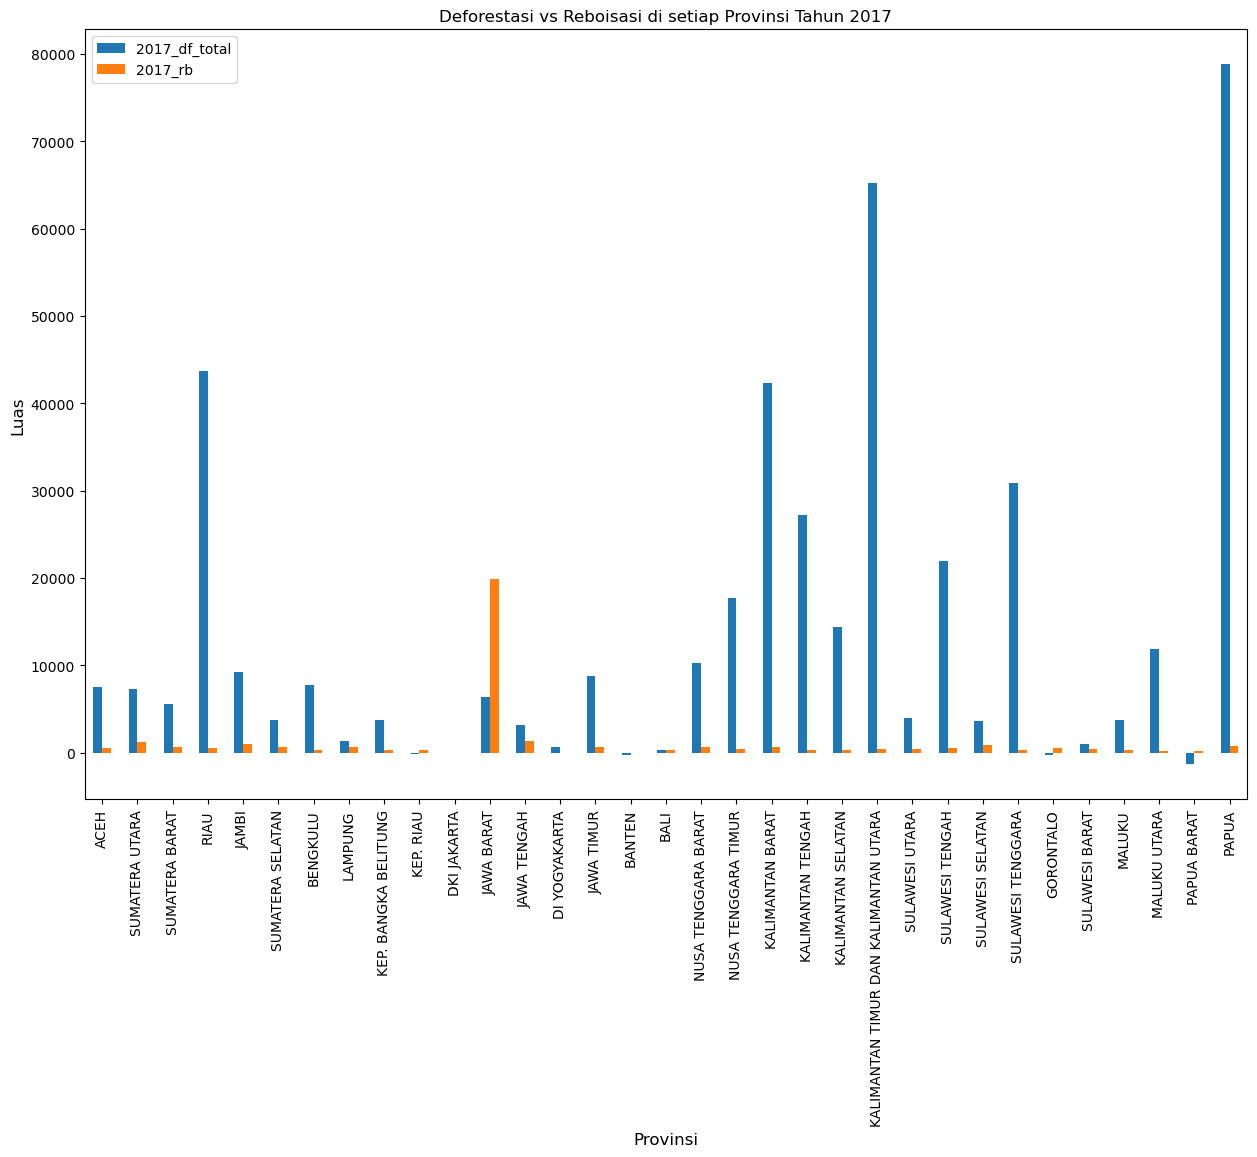

In [29]:
forest_plot = forest1.plot(x='Provinsi',y=["2017_df_total", "2017_rb"], kind='bar', title ="Deforestasi vs Reboisasi di setiap Provinsi Tahun 2017",figsize=(15,10),legend=True)
forest_plot.plot();
plt.xlabel("Provinsi",fontsize=12)
plt.ylabel("Luas",fontsize=12)
plt.show()

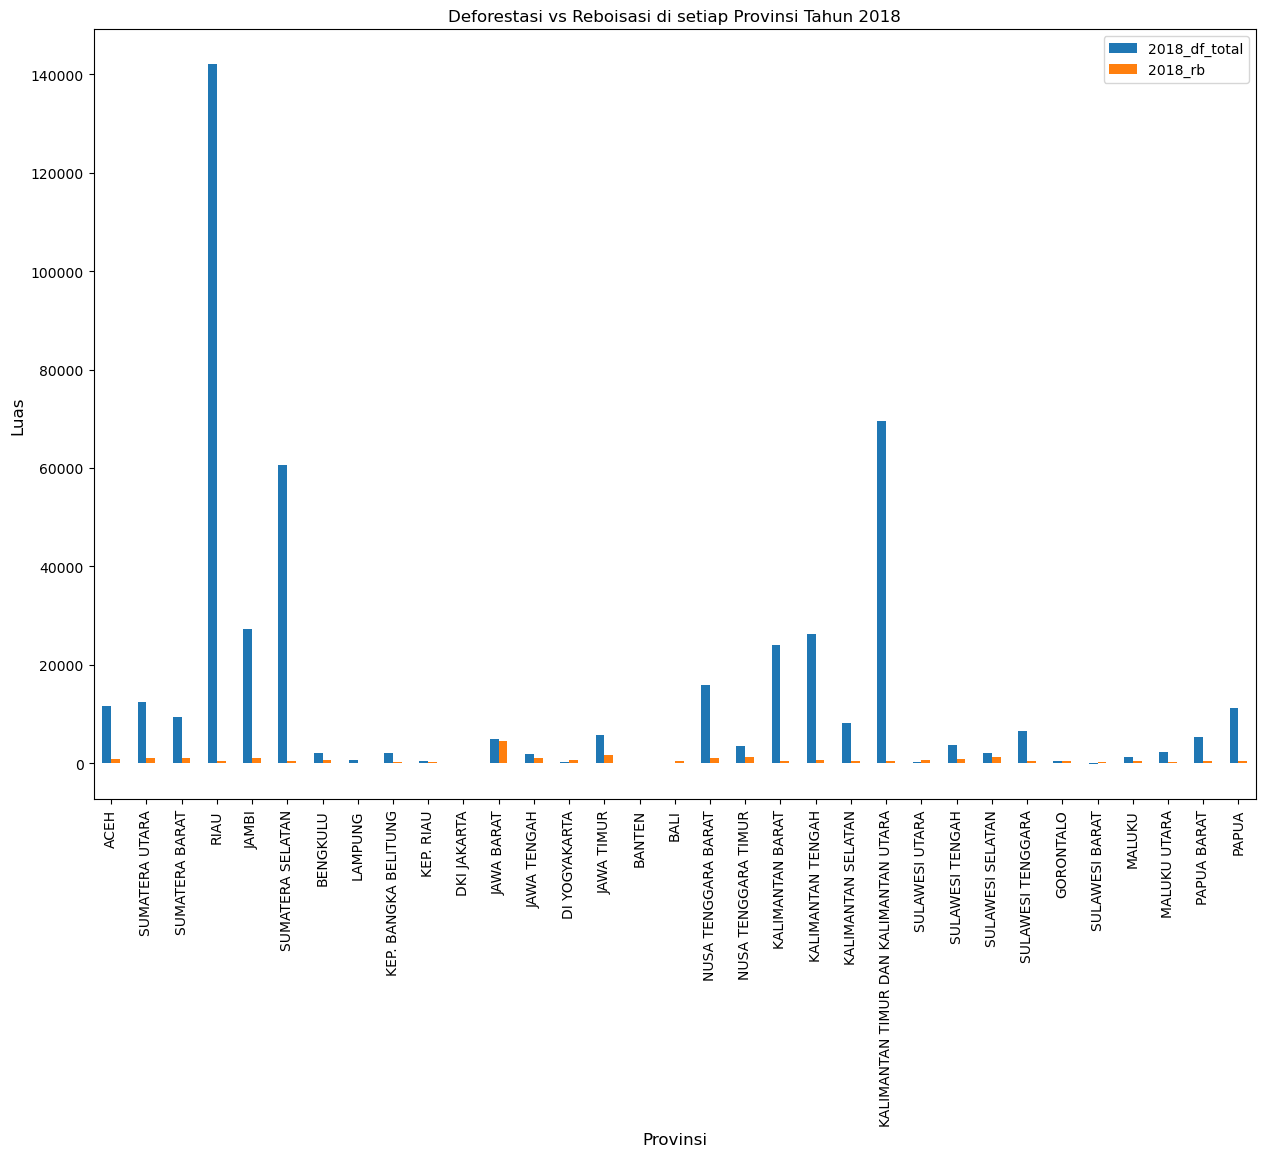

In [30]:
forest1.plot(x='Provinsi',y=["2018_df_total", "2018_rb"], kind='bar', title ="Deforestasi vs Reboisasi di setiap Provinsi Tahun 2018",figsize=(15,10),legend=True)
forest_plot.plot();
plt.xlabel("Provinsi",fontsize=12)
plt.ylabel("Luas",fontsize=12)
plt.show()

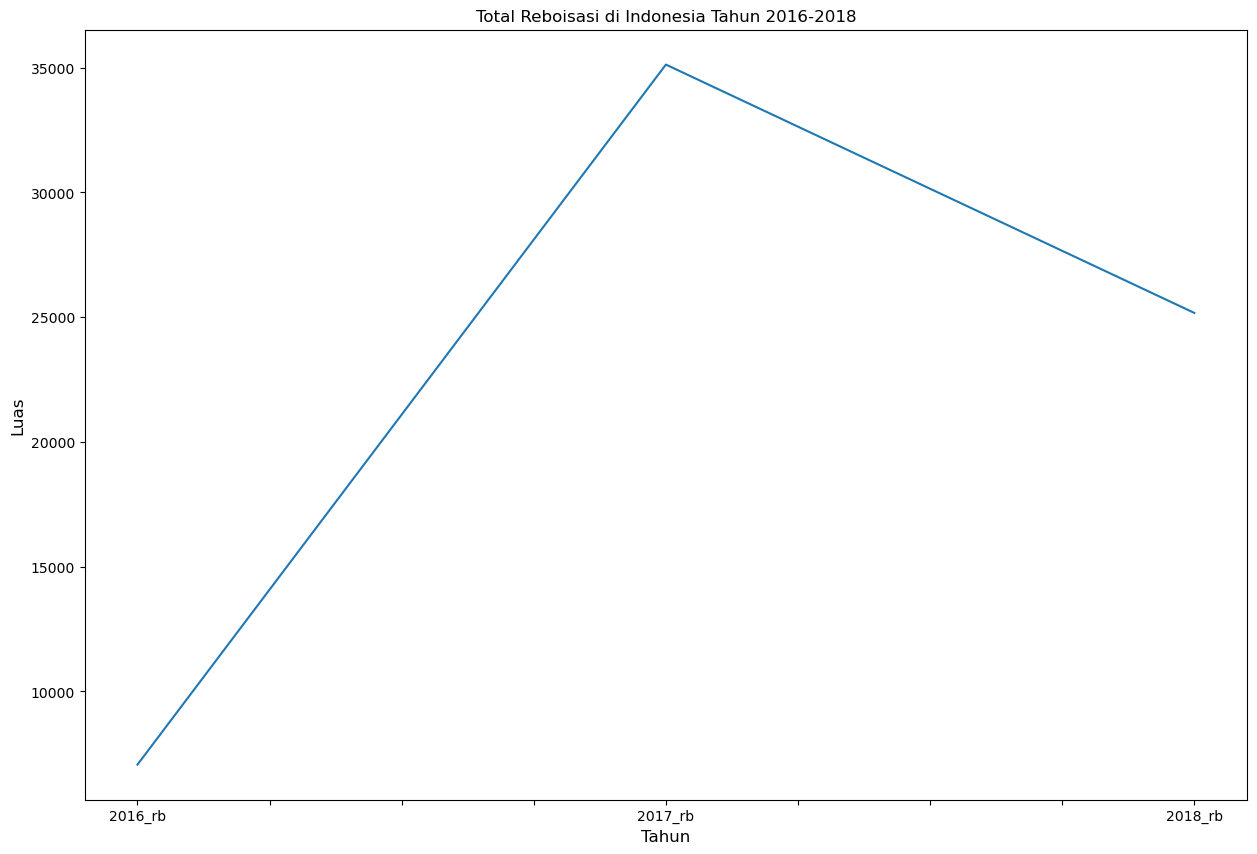

In [32]:
total_plot = total[["2016_rb", "2017_rb", "2018_rb"]].plot(title ="Total Reboisasi di Indonesia Tahun 2016-2018",figsize=(15,10))
total_plot.plot();
plt.xlabel("Tahun",fontsize=12)
plt.ylabel("Luas",fontsize=12)
plt.show()



## 2. Deforestasi, Penutupan Lahan, dan Volume Perumahan

Keterkaitan angka deforestasi, penutupan lahan, dan volume pembangunan rumah
Apakah hubungan mereka berbanding lurus, berkebalikan, atau sama sekali tidak berhubungan

a) Perbandingan deforestasi hutan dan nonhutan

Berikut visualisasi perbandingan deforestasi hutan dan nonhutan tiap provinsi di Indonesia

<AxesSubplot:title={'center':'Deforestasi Hutan dan Non Hutan Tahun 2016'}, xlabel='Provinsi'>

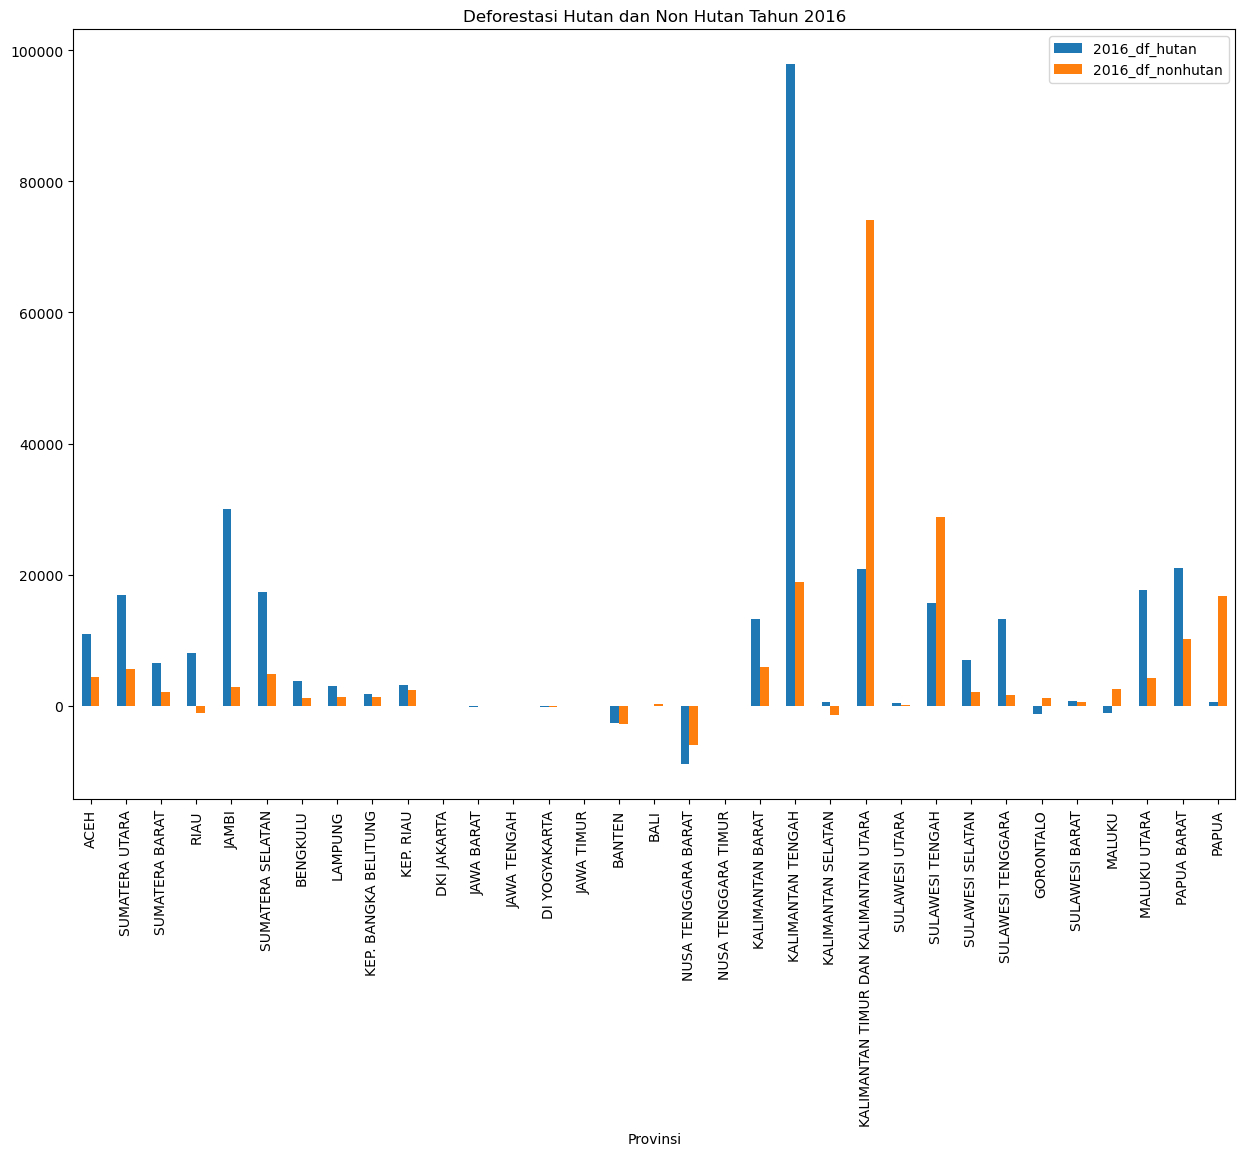

In [33]:
forest_province = forest[forest['Provinsi']!="INDONESIA"]
forest_province.plot.bar(y=['2016_df_hutan','2016_df_nonhutan'], x='Provinsi',figsize=(15,10),legend=True,title ="Deforestasi Hutan dan Non Hutan Tahun 2016")

<AxesSubplot:title={'center':'Deforestasi Hutan dan Non Hutan Tahun 2017'}, xlabel='Provinsi'>

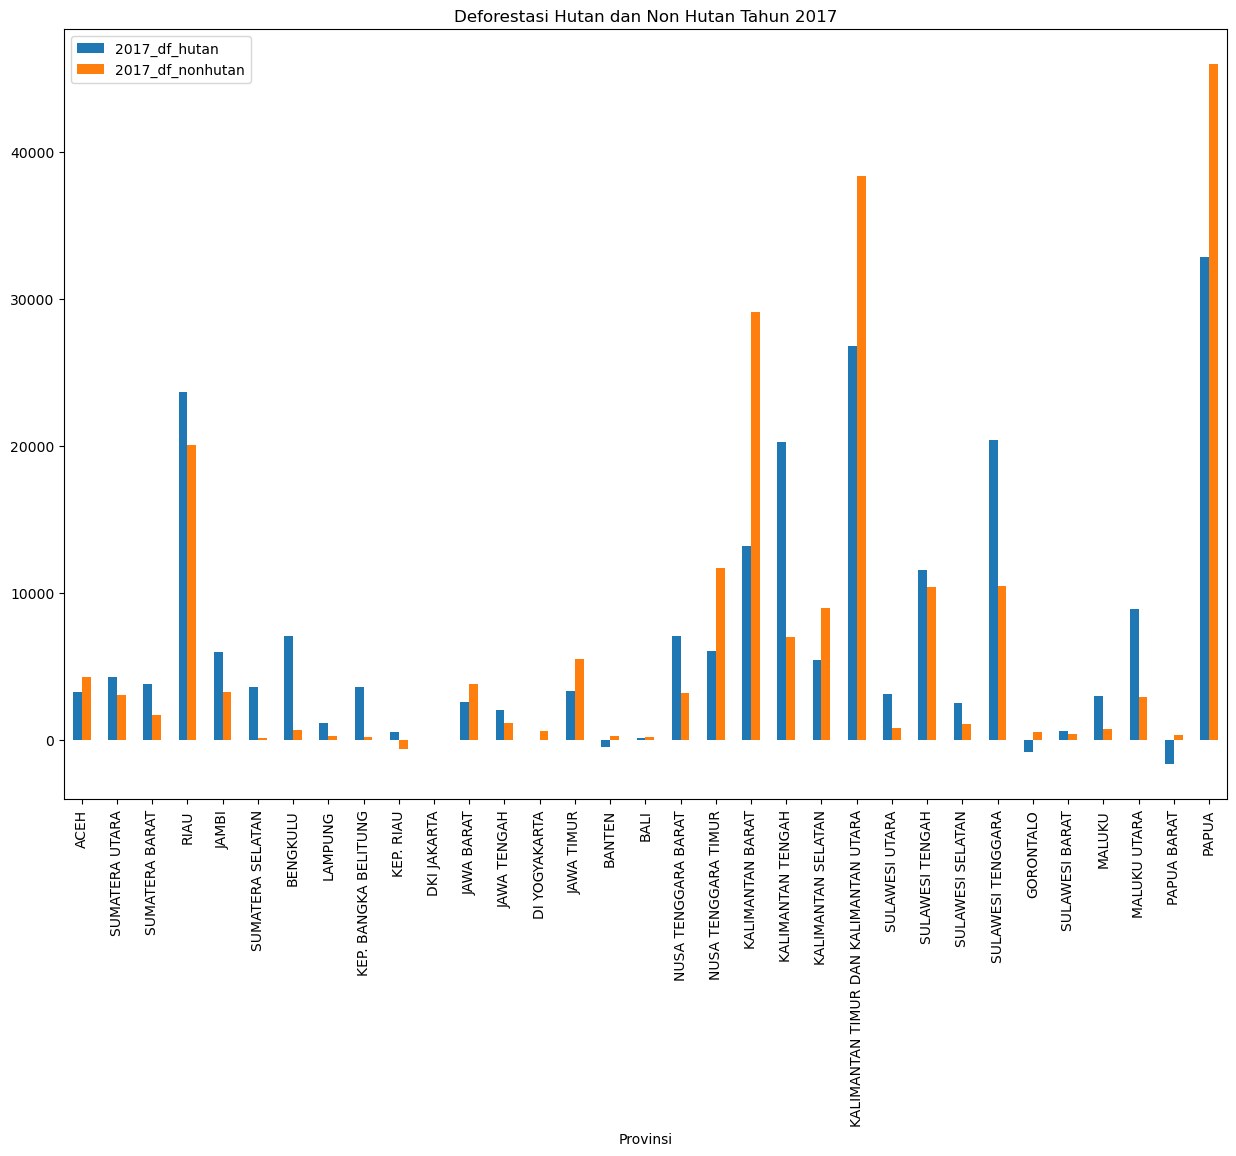

In [34]:
forest_province.plot.bar(y=['2017_df_hutan','2017_df_nonhutan'], x='Provinsi',figsize=(15,10),legend=True,title ="Deforestasi Hutan dan Non Hutan Tahun 2017")

<AxesSubplot:title={'center':'Deforestasi Hutan dan Non Hutan Tahun 2018'}, xlabel='Provinsi'>

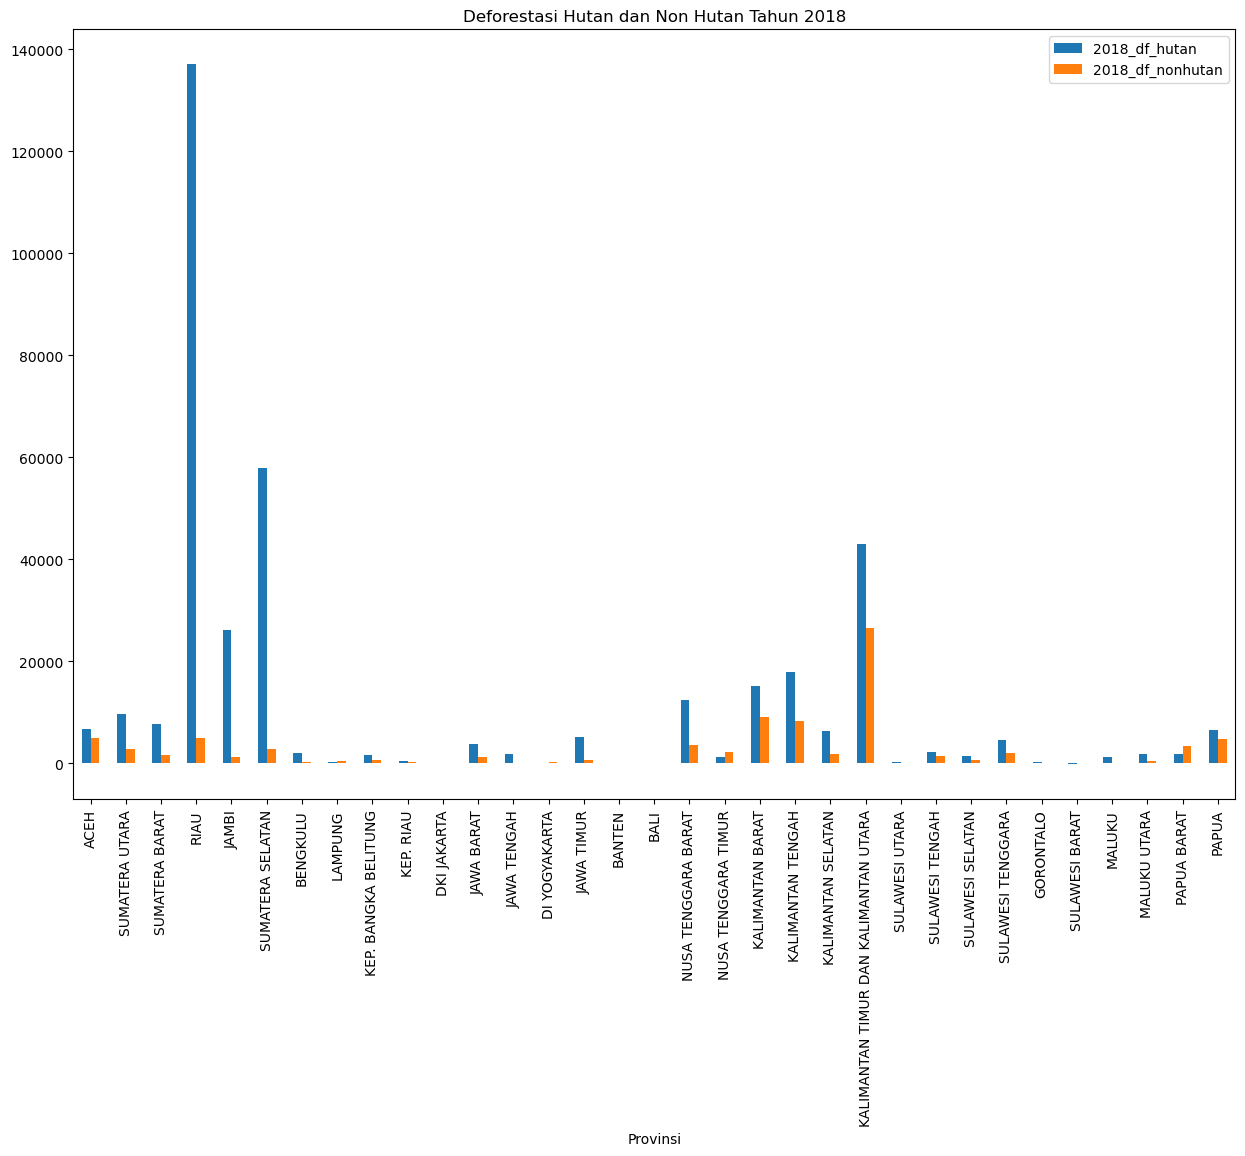

In [35]:
forest_province.plot.bar(y=['2018_df_hutan','2018_df_nonhutan'], x='Provinsi',figsize=(15,10),legend=True,title ="Deforestasi Hutan dan Non Hutan Tahun 2018")

### b) Perbandingan total deforestasi dengan penutupan lahan

Berikut visualisasi perbandingan jumlah total deforestasi dengan jumlah total penutupan lahan di masing-masing provinsi

<AxesSubplot:title={'center':'Jumlah Deforestasi Dibandingkan Jumlah Penutupan Lahan Tahun 2016'}, xlabel='Provinsi'>

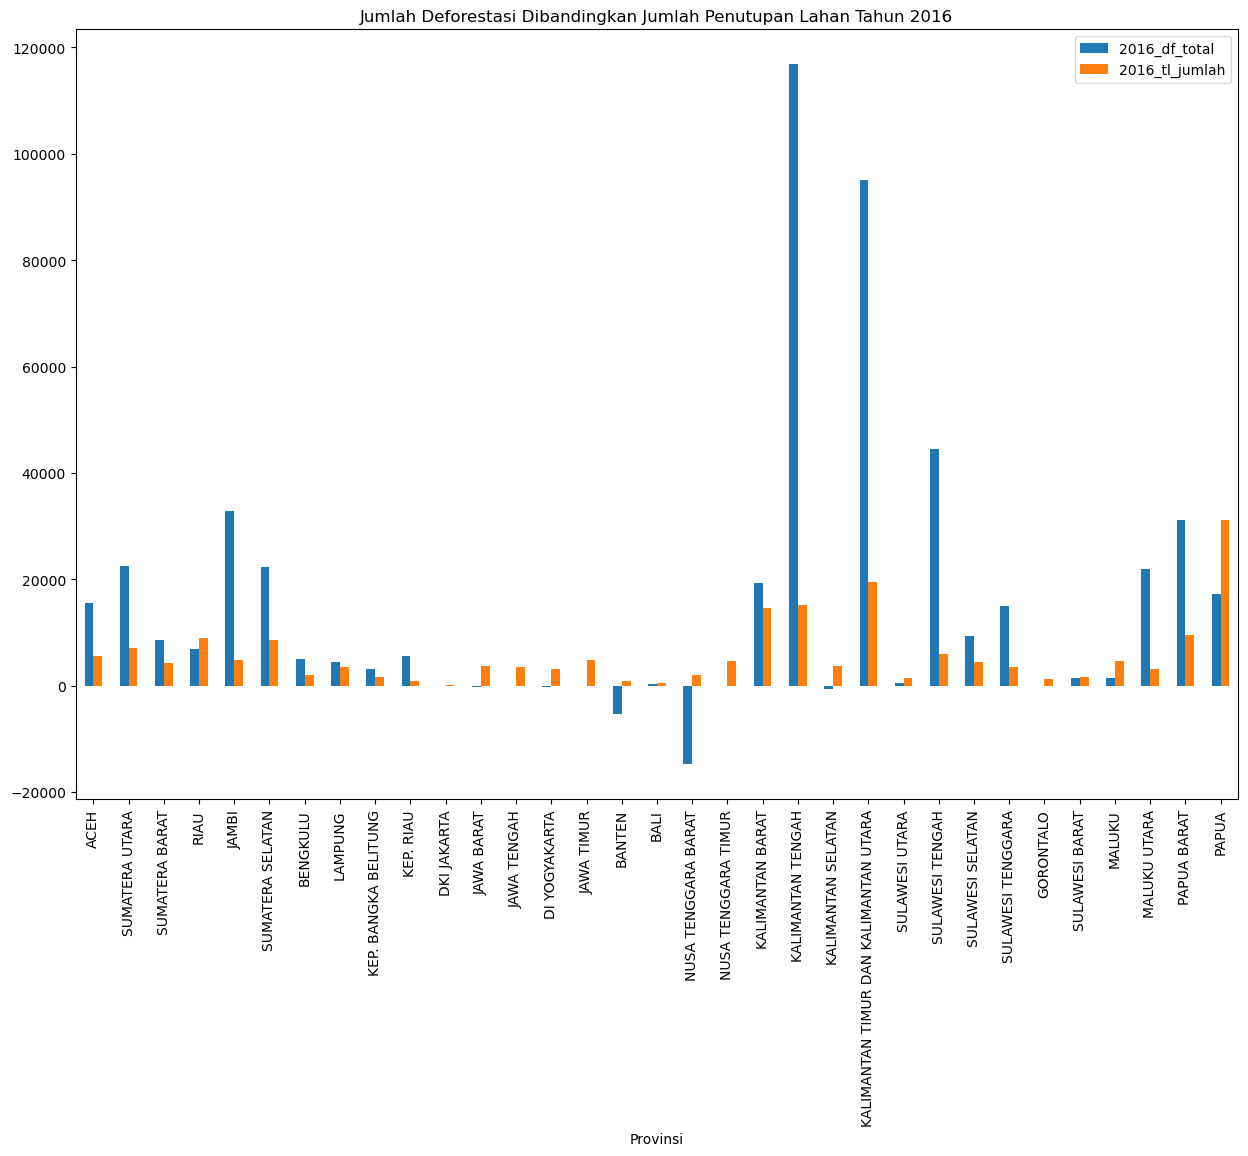

In [36]:
forest_province.plot.bar(y=['2016_df_total','2016_tl_jumlah'], x='Provinsi',figsize=(15,10),legend=True,title ="Jumlah Deforestasi Dibandingkan Jumlah Penutupan Lahan Tahun 2016")

<AxesSubplot:title={'center':'Jumlah Deforestasi Dibandingkan Jumlah Penutupan Lahan Tahun 2017'}, xlabel='Provinsi'>

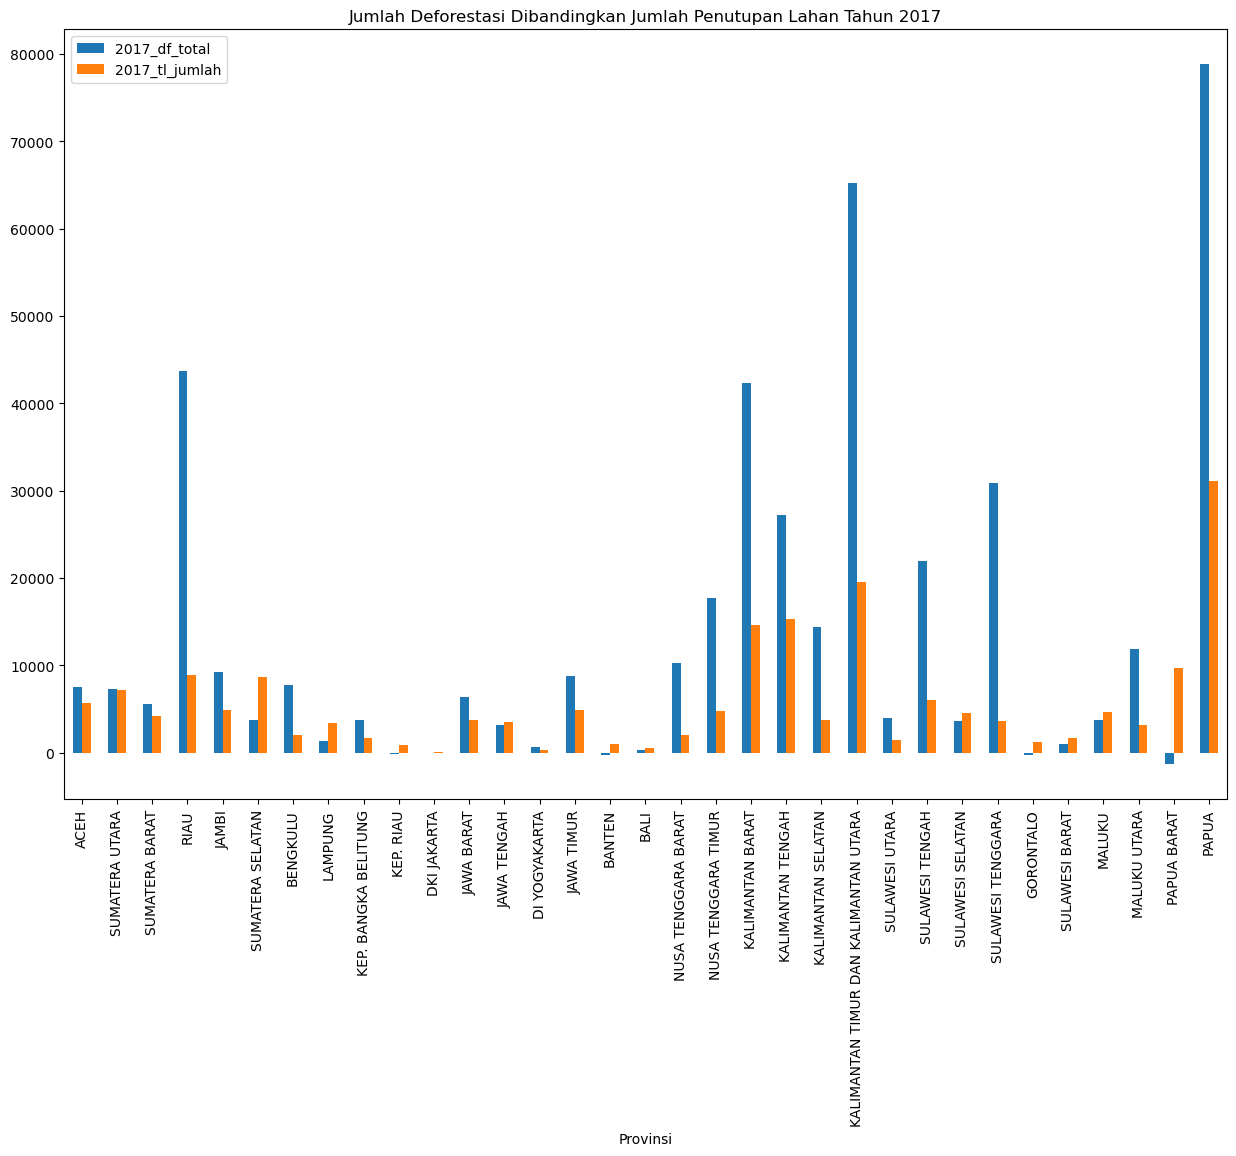

In [37]:
forest_province.plot.bar(y=['2017_df_total','2017_tl_jumlah'], x='Provinsi',figsize=(15,10),legend=True,title ="Jumlah Deforestasi Dibandingkan Jumlah Penutupan Lahan Tahun 2017")

<AxesSubplot:title={'center':'Jumlah Deforestasi Dibandingkan Jumlah Penutupan Lahan Tahun 2018'}, xlabel='Provinsi'>

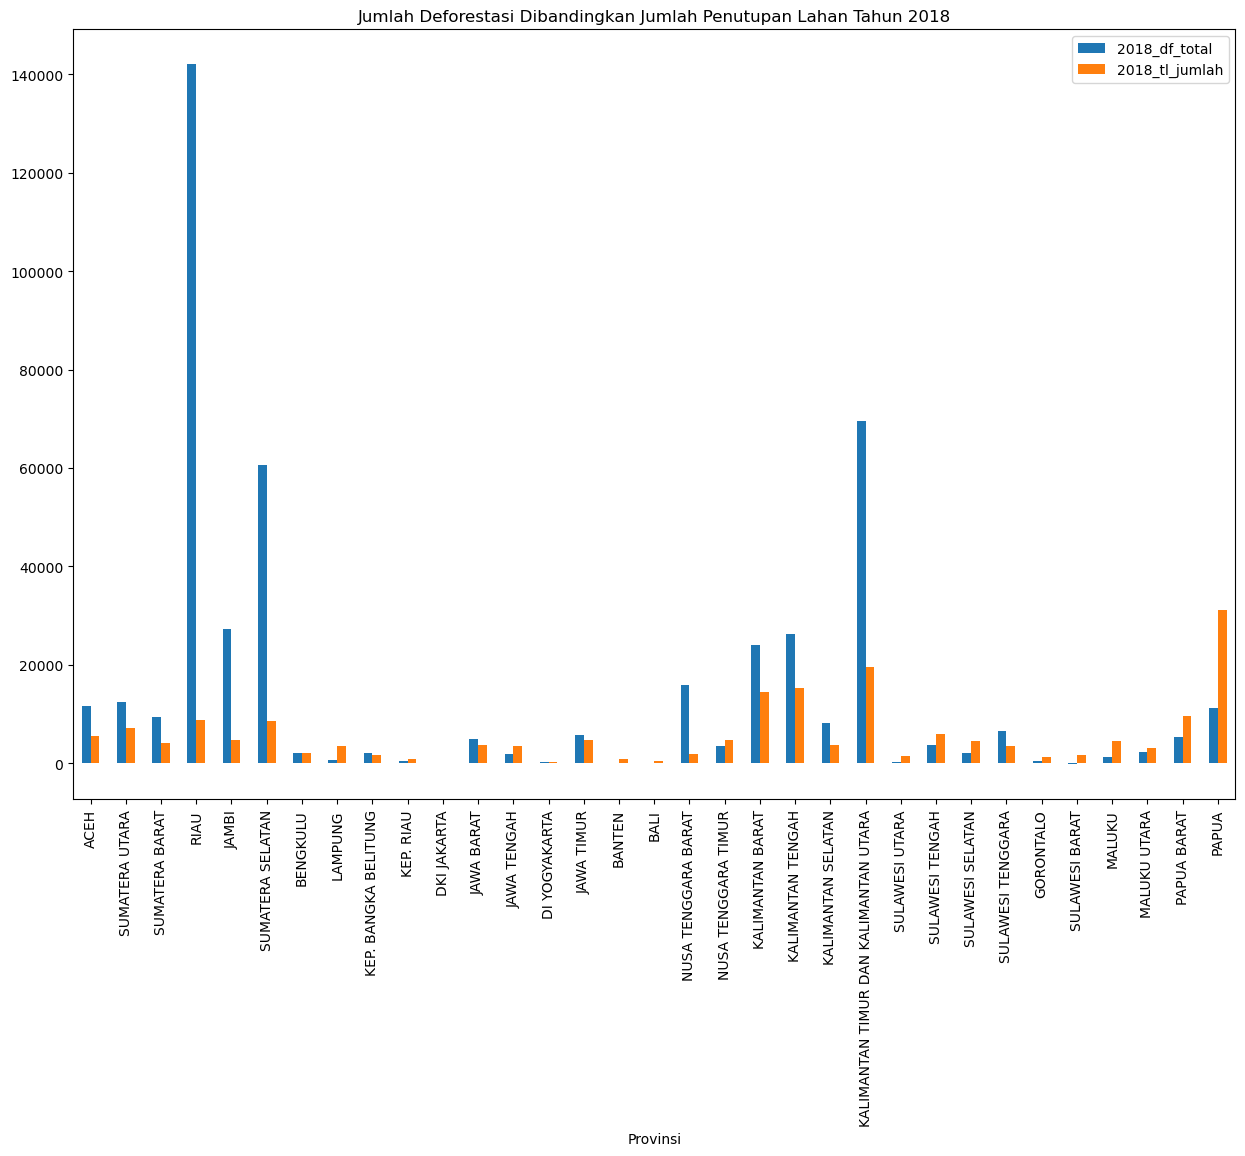

In [38]:
forest_province.plot.bar(y=['2018_df_total','2018_tl_jumlah'], x='Provinsi',figsize=(15,10),legend=True,title ="Jumlah Deforestasi Dibandingkan Jumlah Penutupan Lahan Tahun 2018")

C. Gambaran perbandingan jumlah total deforestasi dengan jumlah volume perumahan di masing-masing provinsi

<AxesSubplot:title={'center':'Jumlah Deforestasi Dibandingkan Jumlah Volume Perumahan Tahun 2018'}, xlabel='Provinsi'>

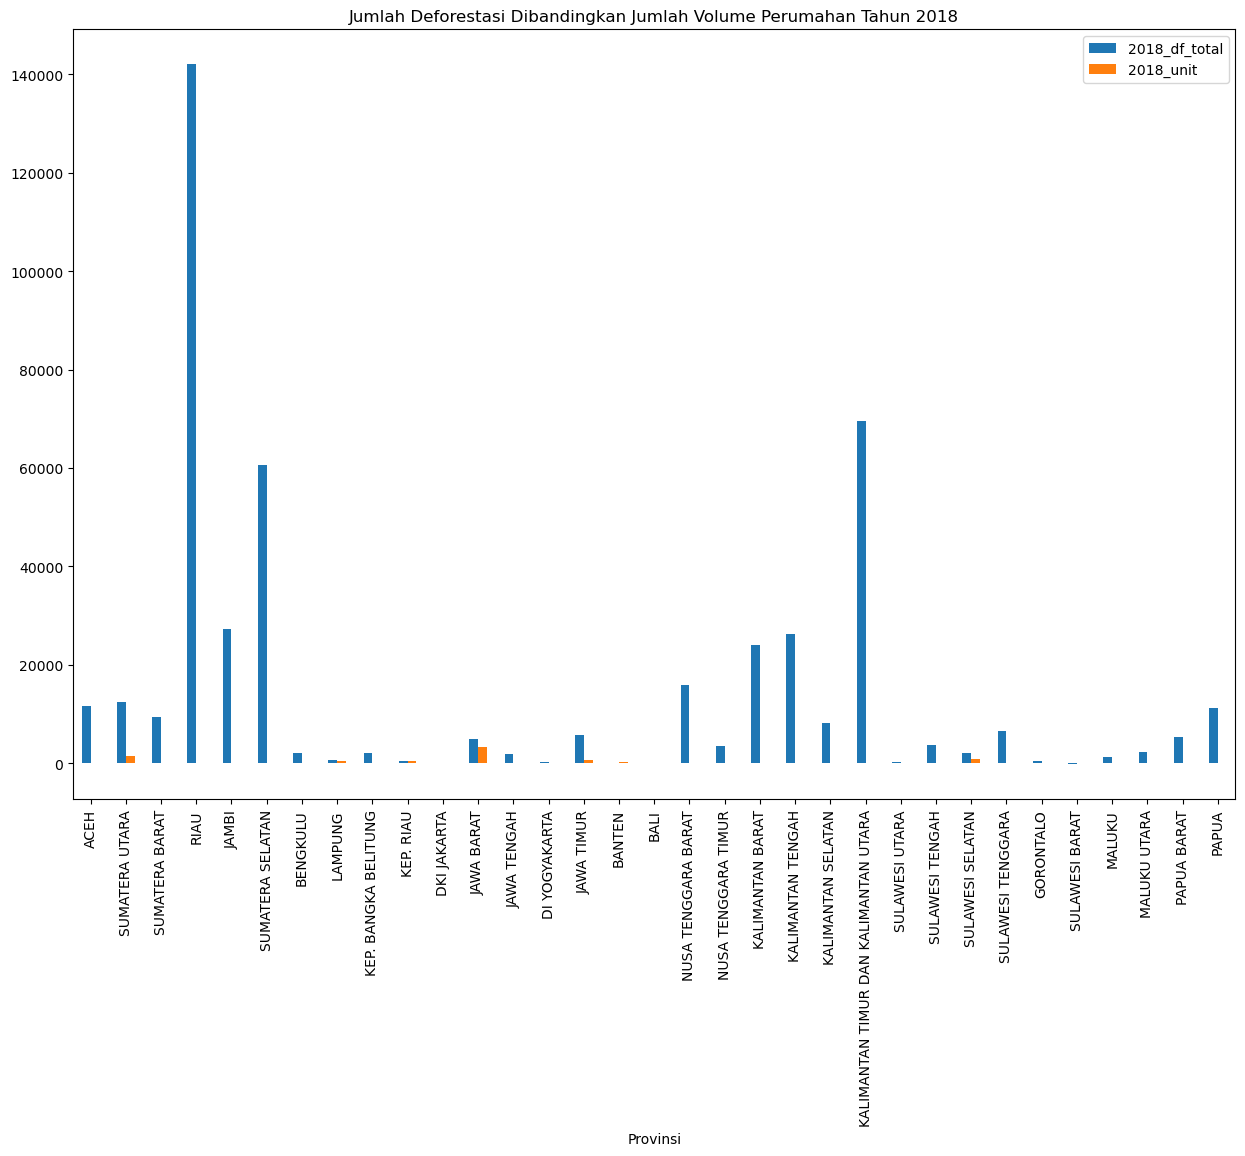

In [41]:
forest_province.plot.bar(y=['2018_df_total','2018_unit'], x='Provinsi',figsize=(15,10),legend=True,title ="Jumlah Deforestasi Dibandingkan Jumlah Volume Perumahan Tahun 2018")